# Amazon Dataset for Sentiment Analysis

## Overview:



~ Machine Learning Project

~ Segregating given dataset of Amazon reviews into good and bad reviews using sentiment analysis.

~ Here, 1 is given for positive labels and 0 is for negative labels

In [1]:
#import required libraries

import pandas as pd
import numpy as np
import nltk
import re
import warnings
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter('ignore')
# %matplotlib 

## DataFrame building

In [2]:
#Reading data from text file

file1 = open("amazon_cells_labelled.txt","r") 
content =file1.read()
print(content.strip() )

So there is no way for me to plug it in here in the US unless I go by a converter.	0
Good case, Excellent value.	1
Great for the jawbone.	1
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!	0
The mic is great.	1
I have to jiggle the plug to get it to line up right to get decent volume.	0
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.	0
If you are Razr owner...you must have this!	1
Needless to say, I wasted my money.	0
What a waste of money and time!.	0
And the sound quality is great.	1
He was very impressed when going from the original battery to the extended battery.	1
If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.	0
Very good quality though	1
The design is very odd, as the ear "clip" is not very comfortable at all.	0
Highly recommend for any one who has a blue tooth phone.	1
I advise EVERYONE DO NOT BE FOOLED!	0
So Far So G

In [3]:
#Spliting the text file whereever it finds new line

content = content.split('\n')

In [4]:
#Creating Pasdas DataFrame

df = pd.DataFrame(content)

## Removing blank rows

In [5]:
#Marking the empty rows with word 'BLANK'

df[0] = df[0].apply(lambda x: x if len(x)>0 else 'BLANK')

In [6]:
df.head()

0
0  So there is no way for me to plug it in here i...
1                     Good case, Excellent value.\t1
2                          Great for the jawbone.\t1
3  Tied to charger for conversations lasting more...
4                               The mic is great.\t1

In [7]:
#Making the dataframe where the 'BLANK' word is not present

df = df[df[0]!='BLANK']

In [8]:
#spliting target and content 

df[['content','target']] = df[0].str.split('\t',expand=True) 

In [9]:
#Droping the column which was earlier named as '0'

df.drop(columns=0,inplace=True)

## Text Preprocessing

In [10]:
#removing special charecters
df.content = df.content.apply(lambda x: re.sub(re.compile("[^\w\s]"), "", x) )

In [11]:
#removing space from front and back of the string
df.content = df.content.apply(lambda x : x.strip())

In [12]:
df.head()

content target
0  So there is no way for me to plug it in here i...      0
1                          Good case Excellent value      1
2                              Great for the jawbone      1
3  Tied to charger for conversations lasting more...      0
4                                   The mic is great      1

In [13]:
# Converting data into lower
df.content = df.content.apply(lambda x : x.lower())


In [14]:
df.head()

content target
0  so there is no way for me to plug it in here i...      0
1                          good case excellent value      1
2                              great for the jawbone      1
3  tied to charger for conversations lasting more...      0
4                                   the mic is great      1

In [15]:
# Downloading stopwords of english language

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'his', 'aren', 'it', "didn't", 'off', 'who', 'at', 'ours', 'out', 'they', 'from', 'during', 'doing', 'if', 'both', 'can', 'i', 'other', 'in', 'on', 'hadn', 'himself', 'had', 'such', "you'd", "she's", "weren't", "hasn't", 'haven', "needn't", 't', 'mightn', 'm', 'nor', 'where', 'just', 'why', 'are', 'theirs', 'we', 'of', 'once', 'under', 'shan', "couldn't", "shouldn't", "doesn't", 'about', 'between', 'being', 'have', 'all', 'isn', 'yours', 'any', 'has', 'the', 'then', 'with', 'yourself', 'been', 'and', 'by', 'she', "isn't", 'does', 'here', 'into', 'there', "mightn't", 'few', 'as', 'am', 'be', "it's", 'that', 'do', 'this', "that'll", 'until', 'o', 'wasn', 'me', 'before', 'while', 'now', 'after', 'to', 'most', 'ain', 'so', 'your', 'again', 'no', 'own', "wasn't", 'very', 'same', 've', 'a', 'which', 'more', 'he', 'did', 'than', 'too', "you've", 'ourselves', 'above', "you're", 'each', 're', 'themselves', 'through', 'when', 'is', 'my', 'll', 'over', 'those', 'only', 'was', 'mustn', 'doesn', '

In [16]:
#functing to remove stopwords from text

def remove_stopwords(text):
    """function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stop_words])

In [17]:
#removing stopwords from each row of the datframe

df.content =  df.content.apply(lambda x : remove_stopwords(x))

In [18]:
df.head()

content target
0                    way plug us unless go converter      0
1                          good case excellent value      1
2                                      great jawbone      1
3  tied charger conversations lasting 45 minutesm...      0
4                                          mic great      1

In [19]:
#removing numerics from the dataframe 

df.content =  df.content.apply(lambda x : re.sub(r"\d+", "", x))

In [20]:
df.head()

content target
0                    way plug us unless go converter      0
1                          good case excellent value      1
2                                      great jawbone      1
3  tied charger conversations lasting  minutesmaj...      0
4                                          mic great      1

## Word2Vec 

## self train

Here I have converted every word to a vector of dimention 400 and trained the model using Word2Vec with the available words from the file itself.

In [21]:
#tokenizing the data

# from nltk.tokenize import word_tokenize
# df.content =  df.content.apply(lambda x : word_tokenize(x))

In [22]:
# training model from the dataset 
# model = Word2Vec(df.content.values, min_count=1,size = 400 ,iter=500)


In [23]:
#poloting the words

# from sklearn.decomposition import PCA
# import matplotlib.pylab as plt
# X = model[model.wv.vocab]
# pca = PCA(n_components=2)
# result = pca.fit_transform(X)
# # create a scatter plot of the projection
# plt.figure(figsize=(10,10))
# plt.scatter(result[:, 0], result[:, 1])
# words = list(model.wv.vocab)
# for i, word in enumerate(words):
# 	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
# plt.show()

In [24]:
#checking for similar words

# model.wv.most_similar("great",topn=20)

In [25]:
#Checking the shape of the model
# model.wv.vectors.shape

In [26]:
#Function to convert the word to vector

# def word2vec(text):
#     vec=[]
#     for word in text:
#         vec.append(model.wv.get_vector(word))
#     return vec

In [27]:
# df.content =  df.content.apply(lambda x : word2vec(x))

In [28]:
# len(df.content.iloc[0][0])
# df.content.iloc[0]

In [29]:
#taking mean of each row

# df['content_mean'] = df.content.apply(lambda x: np.mean(x,axis=0))

In [30]:
#earlier, Df.Content was containing one row with all the dimention of a vector. 
#Converting each dimention of the vector to a cell 

# lst = []
# for i in df.content_mean.values:
#     lst.append(i)
# x =np.array(lst)  

In [31]:
# y = df['target'].astype(int)

## training using pre-trained word2vec model on the Word2Vec Google Code Project

For following section pre-trained word2vec model on the Word2Vec Google Code Project needs to be downloaded localy. Following is the link: 
https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

##### (While running this section, comment out the self train section)

In [32]:
from gensim.models import KeyedVectors

# # Traning model from pre-trained word2vec model on the Word2Vec Google Code Project

filename = 'GoogleNews-vectors-negative300.bin' # need to have this file locally
word2vec = KeyedVectors.load_word2vec_format(filename, binary=True)

In [33]:
#converting words to vector using pre trained dataset and taking mean

x=np.array([
            np.mean([word2vec[w] for w in words if w in word2vec] or [np.zeros(300)], axis=0)
            for words in df.content.apply(lambda x: x.split())
        ])

In [34]:
# assigning target values

y = df['target'].astype(int)

### Train/Test Split 

In [35]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=0)

In [36]:
train_x.shape

(700, 300)

## Model Building

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
#forming logistic regression model and traning it

LRModel = LogisticRegression(random_state=0).fit(train_x, train_y)

In [38]:
from sklearn.metrics import classification_report
#test prediction
lr_pred = LRModel.predict(test_x)

#getting evaluation scores
print(classification_report(test_y,lr_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       144
           1       0.84      0.86      0.85       156

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [39]:
# calculating score for logistic regression
lr_score = LRModel.score(test_x, test_y)
print(lr_score)

0.84


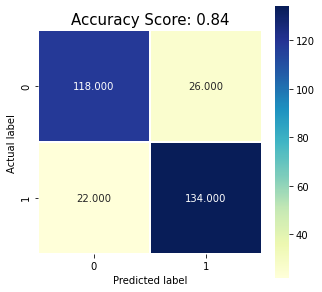

In [40]:
from sklearn.metrics import confusion_matrix
# creatig confusion metrics

cm_lr = confusion_matrix(test_y,lr_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm_lr, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(lr_score.mean())
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')


### RandomForest

In [41]:
from sklearn.ensemble import RandomForestClassifier
#forming random forest model and traning it

RFModel = RandomForestClassifier(n_estimators= 200, max_depth= 15, random_state=42)

RFModel.fit(train_x, train_y)

RandomForestClassifier(max_depth=15, n_estimators=200, random_state=42)

In [42]:
#getting evaluation scores
rf_pred = RFModel.predict(test_x)
print(classification_report(test_y,rf_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       144
           1       0.83      0.78      0.81       156

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



In [43]:
# calculating score for Random Forest
rf_score = RFModel.score(test_x, test_y)
print(rf_score)

0.8033333333333333


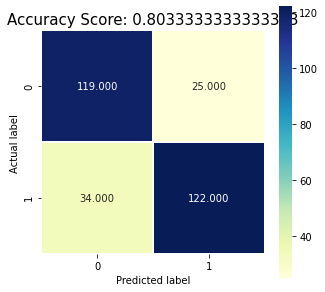

In [44]:
# creatig confusion metrics

cm_rf = confusion_matrix(test_y,rf_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm_rf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'YlGnBu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(rf_score.mean())
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')


As we can see, using Logistic Regression model we are able to predict 84% accurately that whether a review is a positive or negetive review. 